## <center>Regulation, government quality, and green handicraft growth</center>
### <center>Data preparation: European Quality of Government Index </center>

#### DIW Berlin, Caroline Stiel

last modified: October 30, 2024 (cs)


-----------------------------------------

#### 1. Import libraries, define paths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

In [2]:
MAIN = pathlib.Path().resolve()
ORIG = MAIN / "origdata" # original data
DATA = MAIN / "data" # working data
RESULTS = MAIN / "results" # figures etc.

#### 2. Load European Quality of Government Index data set from University of Gothenburg

In [3]:
# data set 2010 till 2024
# -----------------------
dataQoG = pd.read_csv(ORIG/"Gothenburg_qog_eqi_long_24.csv",delimiter=',', encoding='utf-8')
dataQoG = pd.DataFrame(dataQoG)
dataQoG

cname region_code                name  year  EQIregion  nuts_level  \
0      Austria        AT11     Burgenland (AT)  2021        401           2   
1      Austria        AT11     Burgenland (AT)  2024        401           2   
2      Austria        AT11     Burgenland (AT)  2017        401           2   
3      Austria        AT11     Burgenland (AT)  2013        401           2   
4      Austria        AT11     Burgenland (AT)  2010        401           2   
...        ...         ...                 ...   ...        ...         ...   
1045  Slovakia        SK04  Východné Slovensko  2010       1504           2   
1046  Slovakia        SK04  Východné Slovensko  2013       1504           2   
1047  Slovakia        SK04  Východné Slovensko  2017       1504           2   
1048  Slovakia        SK04  Východné Slovensko  2021       1504           2   
1049  Slovakia        SK04  Východné Slovensko  2024       1504           2   

     NUTS0_code NUTS1_code NUTS2_code  NUTS0_name  ...          NUTS2_name  \
0            AT        AT1       AT11  Österreich  ...          Burgenland   
1            AT        AT1       AT11  Österreich  ...          Burgenland   
2            AT        AT1       AT11  Österreich  ...          Burgenland   
3            AT        AT1       AT11  Österreich  ...          Burgenland   
4            AT        AT1       AT11  Österreich  ...          Burgenland   
...         ...        ...        ...         ...  ...                 ...   
1045         SK        SK0       SK04   Slovensko  ...  Východné Slovensko   
1046         SK        SK0       SK04   Slovensko  ...  Východné Slovensko   
1047         SK        SK0       SK04   Slovensko  ...  Východné Slovensko   
1048         SK        SK0       SK04   Slovensko  ...  Východné Slovensko   
1049         SK        SK0       SK04   Slovensko  ...  Východné Slovensko   

        EQI    EQI_me  EQI_low_me  EQI_high_me  qualityp  impartialityp  \
0     0.949  0.169560    0.779440     1.118560     0.852          1.117   
1     0.928  0.148895    0.779105     1.076895     0.686          1.367   
2     0.868  0.141545    0.726455     1.009545     0.452          1.400   
3     1.173  0.308507    0.864493     1.481507     0.767          1.723   
4     1.230  0.179447    1.050553     1.409447     0.847          1.443   
...     ...       ...         ...          ...       ...            ...   
1045 -0.690  0.241271   -0.931271    -0.448729    -0.436         -0.717   
1046 -0.880  0.225981   -1.105981    -0.654019    -0.359         -1.101   
1047 -0.577  0.526846   -1.103846    -0.050154    -0.291         -0.833   
1048 -0.840  0.184570   -1.024570    -0.655430    -0.498         -0.925   
1049 -1.074  0.310259   -1.384259    -0.763741    -0.811         -1.146   

      corruptionp  corruption_subPer  corruption_subExp  
0           0.773           0.990161           1.187420  
1           0.600           0.837699           1.031630  
2           0.665           0.801242           0.141545  
3           0.929                NaN                NaN  
4           1.277                NaN                NaN  
...           ...                ...                ...  
1045       -0.848                NaN                NaN  
1046       -1.107                NaN                NaN  
1047       -0.548          -1.574550           0.526846  
1048       -1.004          -1.529850          -1.050540  
1049       -1.114          -1.406050          -0.505869  

[1050 rows x 21 columns]

In [19]:
# select German data
# ------------------
dataQoG_DE = dataQoG[dataQoG["NUTS0_code"]=="DE"]

# rename columns
# ---------------
dataQoG_DE = dataQoG_DE.rename(columns={'name': 'bl_name'})

# drop irrelevant columns
# -----------------------
dataQoG_DE = dataQoG_DE.drop(columns=['cname','region_code','EQIregion','nuts_level','NUTS0_code','NUTS1_code','NUTS2_code',
                                      'NUTS0_name','NUTS2_name']) 

# browse through data frame
# -------------------------
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataQoG_DE)

bl_name  year              NUTS1_name    EQI    EQI_me  \
135       Baden-Württemberg  2017       Baden-Württemberg  1.144  0.243052   
136       Baden-Württemberg  2021       Baden-Württemberg  0.920  0.192321   
137       Baden-Württemberg  2024       Baden-Württemberg  0.959  0.216906   
138       Baden-Württemberg  2010       Baden-Württemberg  1.000  0.297312   
139       Baden-Württemberg  2013       Baden-Württemberg  0.914  0.226516   
140                  Bayern  2013                  Bayern  0.971  0.230556   
141                  Bayern  2010                  Bayern  0.787  0.322901   
142                  Bayern  2021                  Bayern  1.170  0.165721   
143                  Bayern  2017                  Bayern  1.408  0.277826   
144                  Bayern  2024                  Bayern  1.188  0.234249   
145                  Berlin  2024                  Berlin  0.444  0.302440   
146                  Berlin  2021                  Berlin  0.319  0.303716   
147                  Berlin  2017                  Berlin  0.682  0.364151   
148                  Berlin  2010                  Berlin  0.991  0.350370   
149                  Berlin  2013                  Berlin  0.458  0.277019   
150             Brandenburg  2013             Brandenburg  0.552  0.350025   
151             Brandenburg  2017             Brandenburg  0.811  0.292572   
152             Brandenburg  2010             Brandenburg  0.987  0.366064   
153             Brandenburg  2021             Brandenburg  1.004  0.273651   
154             Brandenburg  2024             Brandenburg  0.942  0.329622   
155                  Bremen  2021                  Bremen  0.471  0.393726   
156                  Bremen  2024                  Bremen  0.513  0.446029   
157                  Bremen  2017                  Bremen  1.172  0.317837   
158                  Bremen  2010                  Bremen  0.975  0.293321   
159                  Bremen  2013                  Bremen  0.784  0.354119   
160                 Hamburg  2017                 Hamburg  1.317  0.239323   
161                 Hamburg  2021                 Hamburg  0.977  0.164060   
162                 Hamburg  2010                 Hamburg  0.982  0.282478   
163                 Hamburg  2013                 Hamburg  0.723  0.242879   
164                 Hamburg  2024                 Hamburg  0.881  0.320800   
165                  Hessen  2021                  Hessen  1.041  0.176427   
166                  Hessen  2024                  Hessen  1.155  0.264854   
167                  Hessen  2013                  Hessen  0.788  0.254513   
168                  Hessen  2010                  Hessen  0.708  0.261913   
169                  Hessen  2017                  Hessen  1.138  0.272067   
170  Mecklenburg-Vorpommern  2017  Mecklenburg-Vorpommern  1.242  0.229798   
171  Mecklenburg-Vorpommern  2024  Mecklenburg-Vorpommern  0.820  0.339945   
172  Mecklenburg-Vorpommern  2021  Mecklenburg-Vorpommern  1.131  0.186954   
173  Mecklenburg-Vorpommern  2013  Mecklenburg-Vorpommern  0.781  0.296003   
174  Mecklenburg-Vorpommern  2010  Mecklenburg-Vorpommern  0.968  0.278621   
175           Niedersachsen  2010           Niedersachsen  0.957  0.286405   
176           Niedersachsen  2017           Niedersachsen  1.320  0.247481   
177           Niedersachsen  2013           Niedersachsen  0.987  0.242241   
178           Niedersachsen  2021           Niedersachsen  1.148  0.193707   
179           Niedersachsen  2024           Niedersachsen  1.100  0.283749   
180     Nordrhein-Westfalen  2021     Nordrhein-Westfalen  0.970  0.196758   
181     Nordrhein-Westfalen  2010     Nordrhein-Westfalen  0.785  0.334334   
182     Nordrhein-Westfalen  2024     Nordrhein-Westfalen  0.854  0.305818   
183     Nordrhein-Westfalen  2017     Nordrhein-Westfalen  0.827  0.380345   
184     Nordrhein-Westfalen  2013     Nordrhein-Westfalen  0.673  0.303482   
185         Rheinland-Pfalz  2010         

#### 3. Overview

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


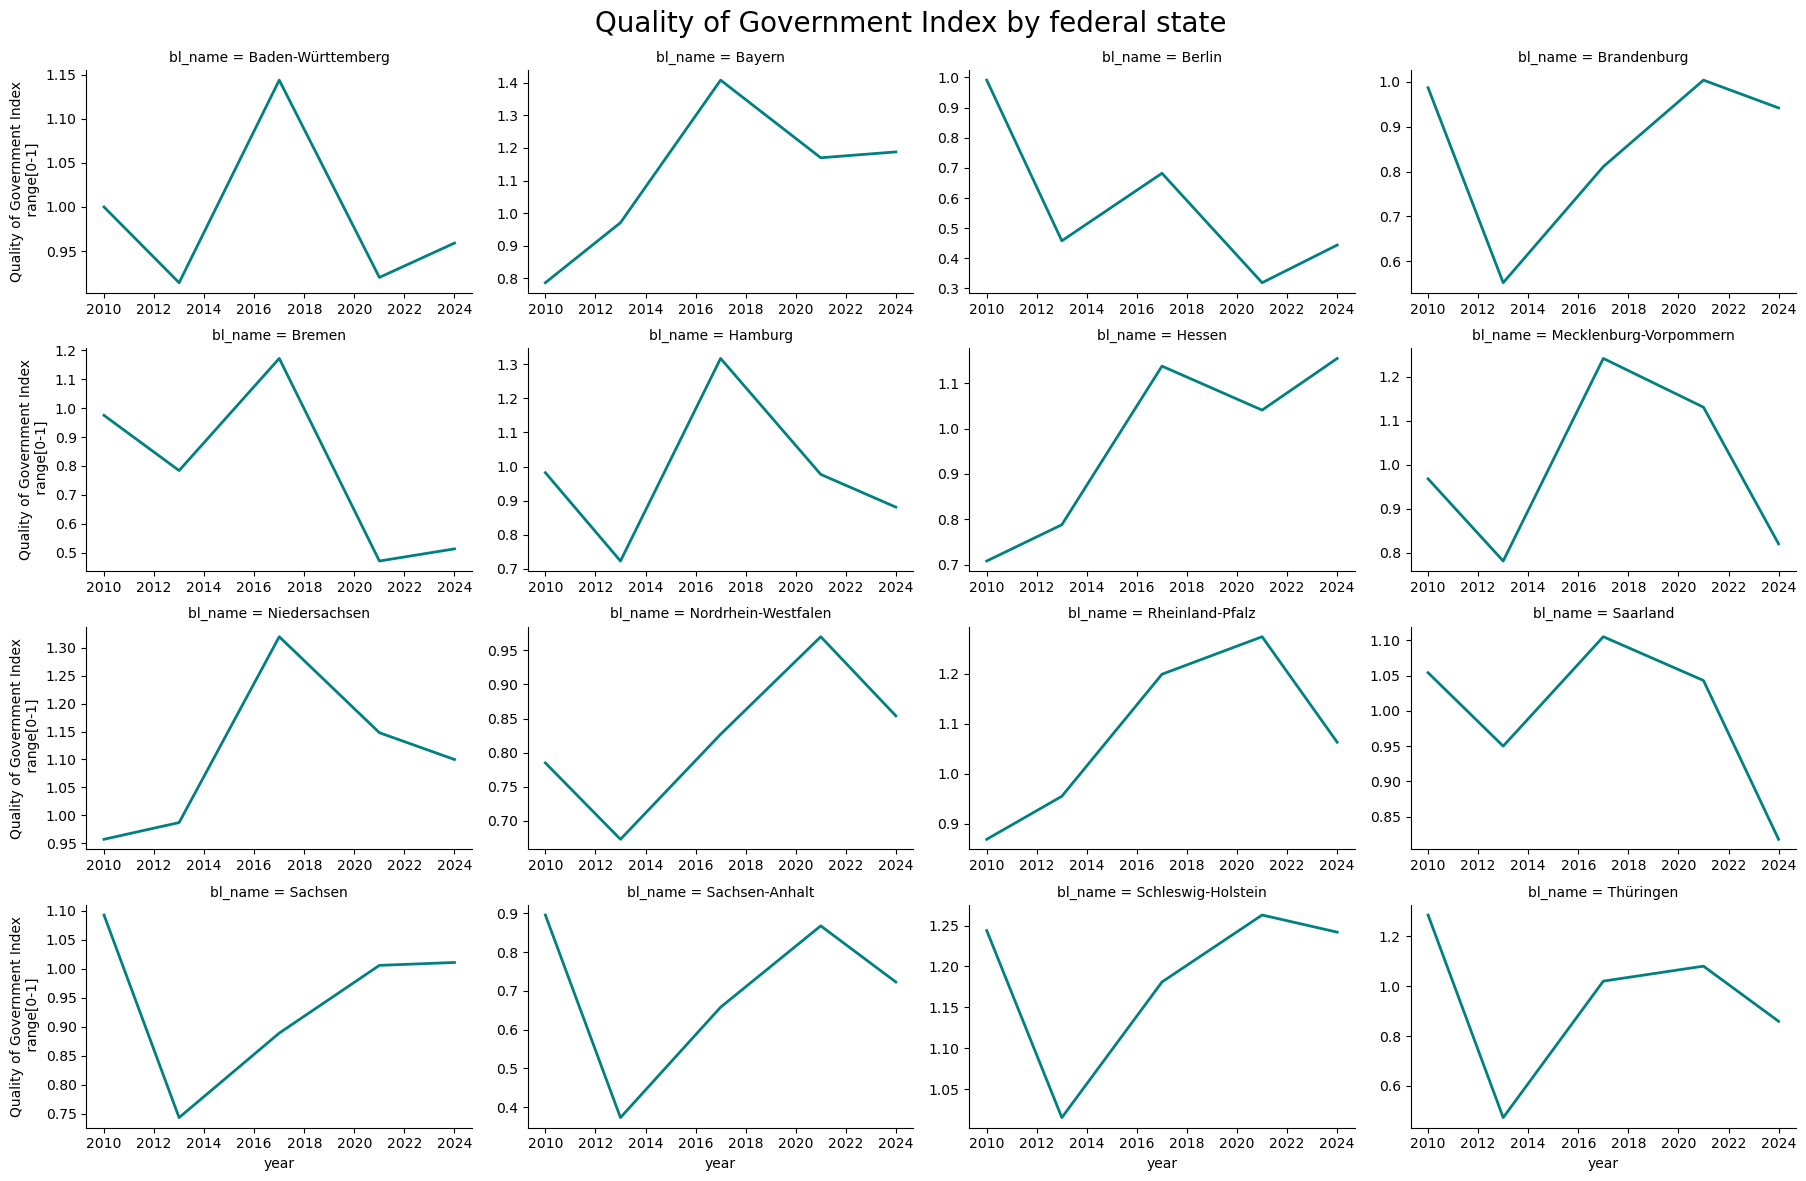

In [20]:
# Quality of Government Index by federal state
# --------------------------------------------
figNY1 = sns.FacetGrid(dataQoG_DE, col='bl_name', sharex=False, sharey=False, col_wrap=4, height=3, aspect=1.5)
figNY1.map_dataframe(sns.lineplot, x='year', y='EQI',color="teal",linewidth=2)
for ax in figNY1.axes.flatten(): ax.ticklabel_format(style='plain', axis='y')
figNY1.set_axis_labels(y_var="Quality of Government Index\n range[0-1]")
figNY1.fig.suptitle('Quality of Government Index by federal state',fontsize=20)
figNY1.fig.subplots_adjust(top=.93) # adjust the space between title and figure

#### 4. Export data frame to csv

In [21]:
dataQoG_DE.to_csv(DATA/"dataQoG.csv", index=False, sep=';', encoding='latin-1')

#### 5. Load green handicraft *(Klimahandwerk)* data set

In [22]:
# data set 2008 till 2022
# -----------------------
dataGHC = pd.read_csv(DATA/"dataGHC.csv",delimiter=';', encoding='latin-1')
dataGHC = pd.DataFrame(dataGHC)

# consider only years after 2012
# -------------------------------
# reason: data for 6 professions only avail after 2012
dataGHC = dataGHC[dataGHC["year"]>2012]

# browse through data frame
# -------------------------
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataGHC)

year  bl                 bl_name        wz  \
2080  2013   8       Baden-Württemberg  HWO-A-01   
2081  2013   8       Baden-Württemberg  HWO-A-03   
2082  2013   8       Baden-Württemberg  HWO-A-04   
2083  2013   8       Baden-Württemberg  HWO-A-05   
2084  2013   8       Baden-Württemberg  HWO-A-06   
2085  2013   8       Baden-Württemberg  HWO-A-07   
2086  2013   8       Baden-Württemberg  HWO-A-43   
2087  2013   8       Baden-Württemberg  HWO-A-09   
2088  2013   8       Baden-Württemberg  HWO-A-10   
2089  2013   8       Baden-Württemberg  HWO-A-23   
2090  2013   8       Baden-Württemberg  HWO-A-24   
2091  2013   8       Baden-Württemberg  HWO-A-25   
2092  2013   8       Baden-Württemberg  HWO-A-27   
2093  2013   8       Baden-Württemberg  HWO-A-39   
2094  2013   8       Baden-Württemberg  HWO-A-42   
2095  2013   8       Baden-Württemberg  HWO-A-44   
2096  2013   8       Baden-Württemberg  HWO-A-47   
2097  2013   8       Baden-Württemberg  HWO-A-52   
2098  2013   8       Baden-Württemberg  HWO-A-13   
2099  2013   8       Baden-Württemberg  HWO-A-18   
2100  2013   8       Baden-Württemberg  HWO-A-21   
2101  2013   8       Baden-Württemberg  HWO-A-26   
2102  2013   8       Baden-Württemberg  HWO-A-45   
2103  2013   8       Baden-Württemberg  HWO-A-17   
2104  2013   8       Baden-Württemberg  HWO-A-20   
2105  2013   8       Baden-Württemberg  HWO-A-12   
2106  2013   9                  Bayern  HWO-A-01   
2107  2013   9                  Bayern  HWO-A-03   
2108  2013   9                  Bayern  HWO-A-04   
2109  2013   9                  Bayern  HWO-A-05   
2110  2013   9                  Bayern  HWO-A-06   
2111  2013   9                  Bayern  HWO-A-07   
2112  2013   9                  Bayern  HWO-A-43   
2113  2013   9                  Bayern  HWO-A-09   
2114  2013   9                  Bayern  HWO-A-10   
2115  2013   9                  Bayern  HWO-A-23   
2116  2013   9                  Bayern  HWO-A-24   
2117  2013   9                  Bayern  HWO-A-25   
2118  2013   9                  Bayern  HWO-A-27   
2119  2013   9                  Bayern  HWO-A-39   
2120  2013   9                  Bayern  HWO-A-42   
2121  2013   9                  Bayern  HWO-A-44   
2122  2013   9                  Bayern  HWO-A-47   
2123  2013   9                  Bayern  HWO-A-52   
2124  2013   9                  Bayern  HWO-A-13   
2125  2013   9                  Bayern  HWO-A-18   
2126  2013   9                  Bayern  HWO-A-21   
2127  2013   9                  Bayern  HWO-A-26   
2128  2013   9                  Bayern  HWO-A-45   
2129  2013   9                  Bayern  HWO-A-17   
2130  2013   9                  Bayern  HWO-A-20   
2131  2013   9                  Bayern  HWO-A-12   
2132  2013  11                  Berlin  HWO-A-01   
2133  2013  11                  Berlin  HWO-A-03   
2134  2013  11                  Berlin  HWO-A-04   
2135  2013  11                  Berlin  HWO-A-05   
2136  2013  11                  Berlin  HWO-A-06   
2137  2013  11                  Berlin  HWO-A-07   
2138  2013  11                  Berlin  HWO-A-43   
2139  2013  11                  Berlin  HWO-A-09   
2140  2013  11                  Berlin  HWO-A-10   
2141  2013  11                  Berlin  HWO-A-23   
2142  2013  11                  Berlin  HWO-A-24   
2143  2013  11                  Berlin  HWO-A-25   
2144  2013  11                  Berlin  HWO-A-27   
2145  2013  11                  Berlin  HWO-A-39   
2146  2013  11                  Berlin  HWO-A-42   
2147  2013  11                  Berlin  HWO-A-44   
2148  2013  11                  Berlin  HWO-A-47   
2149  2013  11                  Berlin  HWO-A-52   
2150  2013  11                  Berlin  HWO-A-13   
2151  2013  11                  Berlin  HWO-A-18   
2152  2013  11                  Berlin  HWO-A-21   
2153  2013  11                  Berlin  HWO-A-26   
2154  2013  11                  Berlin  HWO-A-45   
2155  2013  11                  Berlin  HWO-A-17   
21

#### 5. Merge Quality of Government data with GENESIS handicraft data set

In [24]:
# merge government quality index to handicraft data
# -------------------------------------------------
data_full = dataGHC.merge(dataQoG_DE,on=["year","bl_name"],how="left")

# browse through data frame
# -------------------------
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_full)

year  bl                 bl_name        wz  \
0     2013   8       Baden-Württemberg  HWO-A-01   
1     2013   8       Baden-Württemberg  HWO-A-03   
2     2013   8       Baden-Württemberg  HWO-A-04   
3     2013   8       Baden-Württemberg  HWO-A-05   
4     2013   8       Baden-Württemberg  HWO-A-06   
5     2013   8       Baden-Württemberg  HWO-A-07   
6     2013   8       Baden-Württemberg  HWO-A-43   
7     2013   8       Baden-Württemberg  HWO-A-09   
8     2013   8       Baden-Württemberg  HWO-A-10   
9     2013   8       Baden-Württemberg  HWO-A-23   
10    2013   8       Baden-Württemberg  HWO-A-24   
11    2013   8       Baden-Württemberg  HWO-A-25   
12    2013   8       Baden-Württemberg  HWO-A-27   
13    2013   8       Baden-Württemberg  HWO-A-39   
14    2013   8       Baden-Württemberg  HWO-A-42   
15    2013   8       Baden-Württemberg  HWO-A-44   
16    2013   8       Baden-Württemberg  HWO-A-47   
17    2013   8       Baden-Württemberg  HWO-A-52   
18    2013   8       Baden-Württemberg  HWO-A-13   
19    2013   8       Baden-Württemberg  HWO-A-18   
20    2013   8       Baden-Württemberg  HWO-A-21   
21    2013   8       Baden-Württemberg  HWO-A-26   
22    2013   8       Baden-Württemberg  HWO-A-45   
23    2013   8       Baden-Württemberg  HWO-A-17   
24    2013   8       Baden-Württemberg  HWO-A-20   
25    2013   8       Baden-Württemberg  HWO-A-12   
26    2013   9                  Bayern  HWO-A-01   
27    2013   9                  Bayern  HWO-A-03   
28    2013   9                  Bayern  HWO-A-04   
29    2013   9                  Bayern  HWO-A-05   
30    2013   9                  Bayern  HWO-A-06   
31    2013   9                  Bayern  HWO-A-07   
32    2013   9                  Bayern  HWO-A-43   
33    2013   9                  Bayern  HWO-A-09   
34    2013   9                  Bayern  HWO-A-10   
35    2013   9                  Bayern  HWO-A-23   
36    2013   9                  Bayern  HWO-A-24   
37    2013   9                  Bayern  HWO-A-25   
38    2013   9                  Bayern  HWO-A-27   
39    2013   9                  Bayern  HWO-A-39   
40    2013   9                  Bayern  HWO-A-42   
41    2013   9                  Bayern  HWO-A-44   
42    2013   9                  Bayern  HWO-A-47   
43    2013   9                  Bayern  HWO-A-52   
44    2013   9                  Bayern  HWO-A-13   
45    2013   9                  Bayern  HWO-A-18   
46    2013   9                  Bayern  HWO-A-21   
47    2013   9                  Bayern  HWO-A-26   
48    2013   9                  Bayern  HWO-A-45   
49    2013   9                  Bayern  HWO-A-17   
50    2013   9                  Bayern  HWO-A-20   
51    2013   9                  Bayern  HWO-A-12   
52    2013  11                  Berlin  HWO-A-01   
53    2013  11                  Berlin  HWO-A-03   
54    2013  11                  Berlin  HWO-A-04   
55    2013  11                  Berlin  HWO-A-05   
56    2013  11                  Berlin  HWO-A-06   
57    2013  11                  Berlin  HWO-A-07   
58    2013  11                  Berlin  HWO-A-43   
59    2013  11                  Berlin  HWO-A-09   
60    2013  11                  Berlin  HWO-A-10   
61    2013  11                  Berlin  HWO-A-23   
62    2013  11                  Berlin  HWO-A-24   
63    2013  11                  Berlin  HWO-A-25   
64    2013  11                  Berlin  HWO-A-27   
65    2013  11                  Berlin  HWO-A-39   
66    2013  11                  Berlin  HWO-A-42   
67    2013  11                  Berlin  HWO-A-44   
68    2013  11                  Berlin  HWO-A-47   
69    2013  11                  Berlin  HWO-A-52   
70    2013  11                  Berlin  HWO-A-13   
71    2013  11                  Berlin  HWO-A-18   
72    2013  11                  Berlin  HWO-A-21   
73    2013  11                  Berlin  HWO-A-26   
74    2013  11                  Berlin  HWO-A-45   
75    2013  11                  Berlin  HWO-A-17   
76

In [27]:
# check whether each federal state was matched
# ---------------------------------------------
pd.crosstab(data_full['bl_name'][data_full['EQI'].isnull()==False],
            data_full['year'][data_full['EQI'].isnull()==False], margins=True, margins_name="sum")

year                    2013  2017  2021   sum
bl_name                                       
Baden-Württemberg         26    26    26    78
Bayern                    26    26    26    78
Berlin                    26    26    26    78
Brandenburg               26    26    26    78
Bremen                    26    26    26    78
Hamburg                   26    26    26    78
Hessen                    26    26    26    78
Mecklenburg-Vorpommern    26    26    26    78
Niedersachsen             26    26    26    78
Nordrhein-Westfalen       26    26    26    78
Rheinland-Pfalz           26    26    26    78
Saarland                  26    26    26    78
Sachsen                   26    26    26    78
Sachsen-Anhalt            26    26    26    78
Schleswig-Holstein        26    26    26    78
Thüringen                 26    26    26    78
sum                      416   416   416  1248

#### 6. Export merged data set

In [28]:
data_full.to_csv(DATA/"dataHanQua.csv", index=False, sep=';', encoding='latin-1')